In [1]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter
import pandas as pd

from IPython.display import Image

In [2]:
smiles_agonist = pd.read_csv('../data/refined_gabaa.csv')[0:827]['smiles'].tolist()
smiles_nonagonist = pd.read_csv('../data/refined_gabaa.csv')[827:]['smiles'].tolist()

In [4]:
print(len(smiles_agonist))
print(len(smiles_nonagonist))

827
1082


"""
Murcko骨架由Murcko等人设计并用药物的形状、结构分析。他们将药物分子拆解成四种单元：
环系结构（ring system）、接头（linker）、骨架（scaffold）、侧链（side chain），
其中scaffold又由ring system和linker组成

Carbon骨架将分子以图的形式表示，对结构进行抽象，即所有的原子作为顶点，所有的键作为边，主要反映了原子间的连接属性。
所有重原子都以碳来代替，所有的键都以单键代替。

"""

# agonist_MurckoScaffold

In [5]:
# 提取Murcko骨架
agonist_MurckoScaffold = []
for smiles in smiles_agonist:
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
    agonist_MurckoScaffold .append(scaffold)

# 统计骨架出现的频率
agonist_MurckoScaffold_counts = Counter(agonist_MurckoScaffold)

# 按出现频率从大到小排列
sorted_agonist_MurckoScaffold_counts = sorted(agonist_MurckoScaffold_counts.items(), key=lambda x: x[1], reverse=True)

sorted_agonist_MurckoScaffold_counts

[('c1ccc(-c2cn3ccccc3n2)cc1', 41),
 ('c1ccncc1', 13),
 ('c1ccccc1', 12),
 ('c1cn[nH]c1', 9),
 ('c1ccc(-c2nnc3c4cnn(-c5ccccc5)c4ncn23)cc1', 8),
 ('O=C(Nc1c(-c2cccs2)nc2ccccn12)c1ccccc1', 8),
 ('c1ccc(-c2ncco2)cc1', 7),
 ('c1ccc(-c2ccc(-c3cn4ccccc4n3)cc2)cc1', 7),
 ('c1ccc(COc2c3cnc4c(c3nn2-c2ccccc2)CCCC4)cc1', 7),
 ('c1ccc2c(c1)-c1nc(Cc3ccno3)nn1Cc1cncn1-2', 7),
 ('c1ccc2c(NC3CCCCC3)ncnc2c1', 6),
 ('c1ccn2ccnc2c1', 6),
 ('O=C(NCc1ccccc1)C(=O)c1c[nH]c2ccccc12', 6),
 ('O=C(CCc1ccccc1)C12CC3CC(CC(C3)C1)C2', 6),
 ('O=S(=O)(Nc1ccccc1)c1ccccc1', 5),
 ('c1ccc(-c2ccncn2)cc1', 5),
 ('O=c1[nH]c(=O)c2c(nc3n(-c4ccccc4)c(-c4ccccc4)cn23)[nH]1', 5),
 ('', 5),
 ('O=C1NC(=O)c2cc(S(=O)(=O)Nc3ccccc3)cc3cccc1c23', 4),
 ('O=C(CSc1cn[nH]c(=O)n1)Nc1ccccc1', 4),
 ('O=S(=O)(c1ccccc1)N1CCc2cc3ccccc3nc21', 4),
 ('c1ccc(-c2nccs2)cc1', 4),
 ('c1ccc2ncncc2c1', 4),
 ('O=C(Cn1cnc2sc(-c3ccccc3)cc2c1=O)Nc1ccccc1', 4),
 ('N=C1NCCS1', 4),
 ('c1ccc(Cc2ccc3c(cnn3-c3ccccc3)c2)cc1', 4),
 ('c1ccc2c(c1)-c1ncnn1Cc1cncn1-2', 4),


In [6]:
len(sorted_agonist_MurckoScaffold_counts)

538

In [7]:
for skeleton, count in sorted_agonist_MurckoScaffold_counts[0:100]:
    print(f'{skeleton}')

c1ccc(-c2cn3ccccc3n2)cc1
c1ccncc1
c1ccccc1
c1cn[nH]c1
c1ccc(-c2nnc3c4cnn(-c5ccccc5)c4ncn23)cc1
O=C(Nc1c(-c2cccs2)nc2ccccn12)c1ccccc1
c1ccc(-c2ncco2)cc1
c1ccc(-c2ccc(-c3cn4ccccc4n3)cc2)cc1
c1ccc(COc2c3cnc4c(c3nn2-c2ccccc2)CCCC4)cc1
c1ccc2c(c1)-c1nc(Cc3ccno3)nn1Cc1cncn1-2
c1ccc2c(NC3CCCCC3)ncnc2c1
c1ccn2ccnc2c1
O=C(NCc1ccccc1)C(=O)c1c[nH]c2ccccc12
O=C(CCc1ccccc1)C12CC3CC(CC(C3)C1)C2
O=S(=O)(Nc1ccccc1)c1ccccc1
c1ccc(-c2ccncn2)cc1
O=c1[nH]c(=O)c2c(nc3n(-c4ccccc4)c(-c4ccccc4)cn23)[nH]1

O=C1NC(=O)c2cc(S(=O)(=O)Nc3ccccc3)cc3cccc1c23
O=C(CSc1cn[nH]c(=O)n1)Nc1ccccc1
O=S(=O)(c1ccccc1)N1CCc2cc3ccccc3nc21
c1ccc(-c2nccs2)cc1
c1ccc2ncncc2c1
O=C(Cn1cnc2sc(-c3ccccc3)cc2c1=O)Nc1ccccc1
N=C1NCCS1
c1ccc(Cc2ccc3c(cnn3-c3ccccc3)c2)cc1
c1ccc2c(c1)-c1ncnn1Cc1cncn1-2
S=C1N=CCC(c2ccccc2)N1
C1CCC2C(C1)CCC1C3CCCC3CCC21
O=C1Nc2ccc(S(=O)(=O)Nc3ccccc3)c3cccc1c23
c1ccc(-c2ncc(NC3CCCCC3)o2)cc1
c1ccc(C2NCCc3ccccc32)cc1
O=C1COc2ccc(-c3cscn3)cc2N1
O=c1c(CN2CCc3ccccc3C2)c[nH]c2ccccc12
c1ccc(Nc2ccnc3ccccc23)cc1
c1ccc(Nc2n

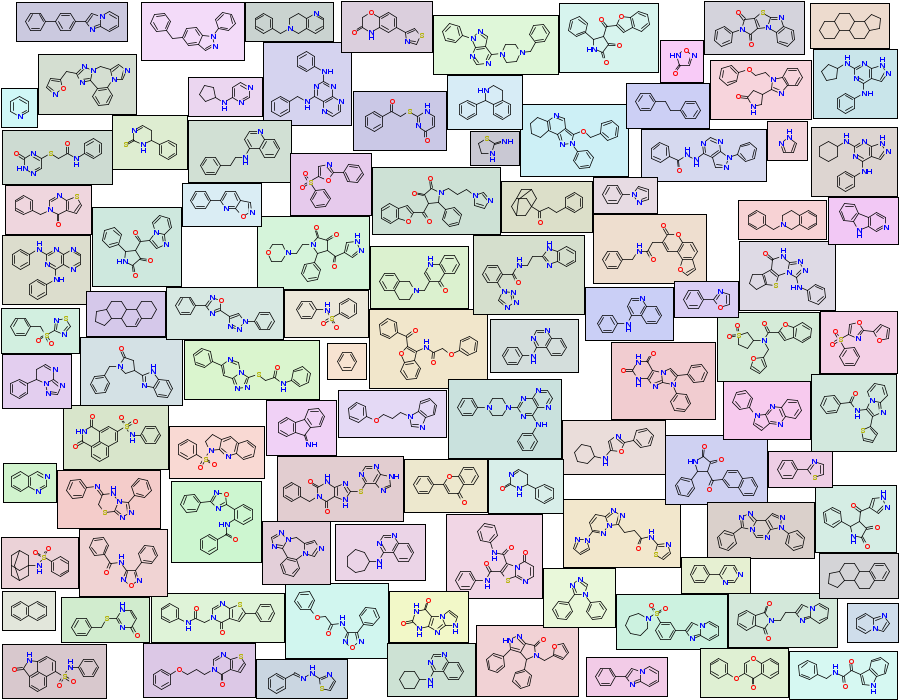

In [8]:
Image(filename='agonist_MurckoScaffold.png')

# agonist_CarbonScaffold

In [9]:
# 提取碳骨架
agonist_CarbonScaffold = []
for smiles in smiles_agonist:
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    agonist_CarbonScaffold.append(scaffold_smiles)
    
agonist_CarbonScaffold_counts = Counter(agonist_CarbonScaffold)

sorted_agonist_CarbonScaffold_counts = sorted(agonist_CarbonScaffold_counts.items(), key=lambda x: x[1], reverse=True)

sorted_agonist_CarbonScaffold_counts

[('C1CCC(C2CC3CCCCC3C2)CC1', 42),
 ('C1CCCCC1', 29),
 ('C1CCC(C2CCCC2)CC1', 16),
 ('C1CCCC1', 16),
 ('C1CCC(CC2CCCC3CCCCC32)CC1', 12),
 ('C1CCC2CCCC2C1', 12),
 ('C1CCC(C2CCCCC2)CC1', 10),
 ('CC1CCCC(C2CCCCC2)C1', 10),
 ('C1CCC(CCC2C(C3CCCCC3)CC3C4CCCCC4CCC23)CC1', 10),
 ('CC1CCCC1', 9),
 ('CC(CC1C2CCCCC2CC1C1CCCC1)C1CCCCC1', 9),
 ('C1CCC2CCCCC2C1', 8),
 ('C1CCC(C2CCC3C2CCC2C(C4CCCCC4)CCC23)CC1', 8),
 ('C1CCC(CC2CC3CC4CCCC4C4CCCCC4C3C2)C1', 8),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 7),
 ('CC(C)(CC1CCCCC1)C1CCCCC1', 7),
 ('C1CCC(C2CCC(C3CC4CCCCC4C3)CC2)CC1', 7),
 ('C1CCC(CC2CCC3CCCC3C2)CC1', 6),
 ('C1CCC(CC2CCC3CCCCC3C2)CC1', 6),
 ('CC(CC1CCCCC1)CC1CCC2CC(C3CCCCC3)CC2C1C', 6),
 ('C1CCC(CC2CCCC2)CC1', 6),
 ('CC(CCC1CCCCC1)C(C)C1CCC2CCCCC21', 6),
 ('CC(CCC1CCCCC1)C12CC3CC(CC(C3)C1)C2', 6),
 ('C1CCC(C2CCCC2C2CCCCC2)CC1', 5),
 ('C1CCC(C2CCCC3CCCCC32)CC1', 5),
 ('CC(CCC1CCCC(C)C1)CC1CCCCC1', 5),
 ('CC1CC(C)C2C(C1)CC1C2CC(C2CCCCC2)C1C1CCCCC1', 5),
 ('', 5),
 ('C1CCC(CC2CCC3C(CCC3C3CCCCC3)C2)CC1', 5

In [11]:
len(sorted_agonist_CarbonScaffold_counts)

418

In [12]:
# 输出smiles
for skeleton, count in sorted_agonist_CarbonScaffold_counts[0:100]:
    print(f'{skeleton}')

C1CCC(C2CC3CCCCC3C2)CC1
C1CCCCC1
C1CCC(C2CCCC2)CC1
C1CCCC1
C1CCC(CC2CCCC3CCCCC32)CC1
C1CCC2CCCC2C1
C1CCC(C2CCCCC2)CC1
CC1CCCC(C2CCCCC2)C1
C1CCC(CCC2C(C3CCCCC3)CC3C4CCCCC4CCC23)CC1
CC1CCCC1
CC(CC1C2CCCCC2CC1C1CCCC1)C1CCCCC1
C1CCC2CCCCC2C1
C1CCC(C2CCC3C2CCC2C(C4CCCCC4)CCC23)CC1
C1CCC(CC2CC3CC4CCCC4C4CCCCC4C3C2)C1
C1CCC2C(C1)CCC1C3CCCC3CCC21
CC(C)(CC1CCCCC1)C1CCCCC1
C1CCC(C2CCC(C3CC4CCCCC4C3)CC2)CC1
C1CCC(CC2CCC3CCCC3C2)CC1
C1CCC(CC2CCC3CCCCC3C2)CC1
CC(CC1CCCCC1)CC1CCC2CC(C3CCCCC3)CC2C1C
C1CCC(CC2CCCC2)CC1
CC(CCC1CCCCC1)C(C)C1CCC2CCCCC21
CC(CCC1CCCCC1)C12CC3CC(CC(C3)C1)C2
C1CCC(C2CCCC2C2CCCCC2)CC1
C1CCC(C2CCCC3CCCCC32)CC1
CC(CCC1CCCC(C)C1)CC1CCCCC1
CC1CC(C)C2C(C1)CC1C2CC(C2CCCCC2)C1C1CCCCC1

C1CCC(CC2CCC3C(CCC3C3CCCCC3)C2)CC1
CC1CC(C)C2CC(C(C)(C)CC3CCCCC3)CC3CCCC1C32
C1CCC(CC2CCCC3CCCC32)CC1
CC1C(CC2CCCCC2)CCC2CCCCC21
CC1CC2CCC(C(C)(C)CC3CCCCC3)C3CCCC1C23
C1CCC(CC2CCC(C3CCCCC3)C2)CC1
CC(C)(C1CCCCC1)C1CCC2CC3CCCCC3CC21
C1CCC2C(C1)CC1CCCCC12
C1CCC(CC2CC3CCCCC3C(CC3CCCCC3)C2)CC1
C1CCC(CCC2CC

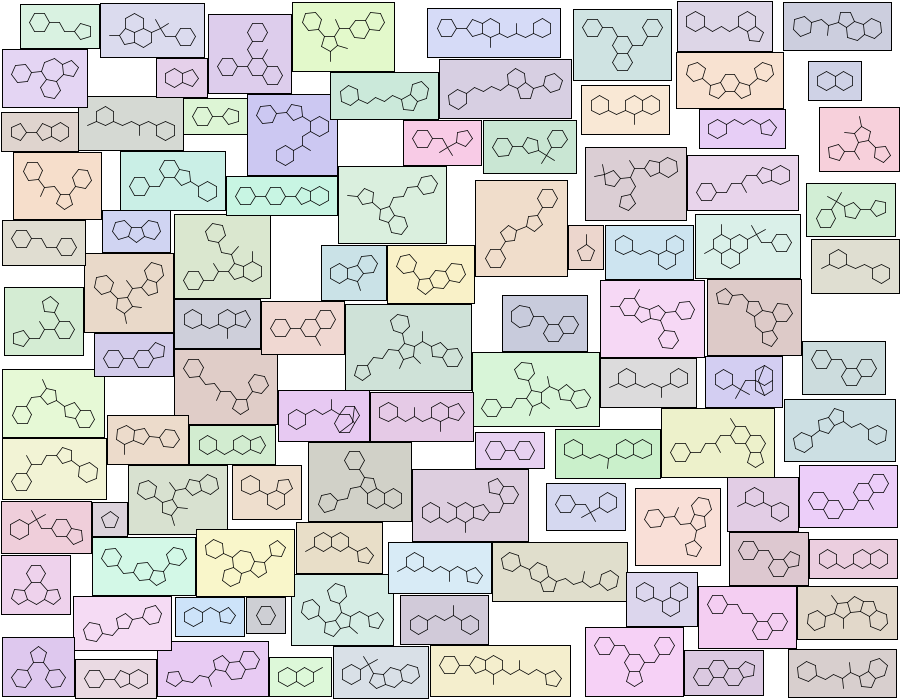

In [13]:
Image(filename='agonist_CarbonScaffold.png')

 # nonagonist_MurckoScaffold

In [14]:
# 提取Murcko骨架
nonagonist_MurckoScaffold = []
for smiles in smiles_nonagonist:
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
    nonagonist_MurckoScaffold.append(scaffold)

# 统计骨架出现的频率
nonagonist_MurckoScaffold_counts = Counter(nonagonist_MurckoScaffold)

# 按出现频率从大到小排列
sorted_nonagonist_MurckoScaffold_counts = sorted(nonagonist_MurckoScaffold_counts.items(), key=lambda x: x[1], reverse=True)

sorted_nonagonist_MurckoScaffold_counts

[('c1cnc2[nH]ncc2c1', 63),
 ('O=C(NCc1ccccc1)C(=O)c1c[nH]c2ccccc12', 45),
 ('c1ccccc1', 32),
 ('O=C(NNc1ccccc1)C(=O)c1c[nH]c2ccccc12', 31),
 ('c1ccc(-c2cnn(-c3ccccc3)c2)cc1', 26),
 ('c1ccc2c(c1)NCc1c(-c3noc(C4CC4)n3)ncn1-2', 24),
 ('c1ccc(-c2nnc3c4ccccc4cnn23)cc1', 22),
 ('O=C(NCCc1ccccc1)C(=O)c1c[nH]c2ccccc12', 20),
 ('C1=CCCC1', 20),
 ('c1ccc(-c2nnc3c4ccccc4c(N4CCCC4)nn23)cc1', 19),
 ('O=C(c1ccccc1)c1cn2cccnc2n1', 19),
 ('c1ccc2c(c1)[nH]c1cnccc12', 18),
 ('N=c1ccc(-c2ccccc2)n[nH]1', 18),
 ('c1ccc(-c2cn3ccccc3n2)cc1', 14),
 ('', 13),
 ('O=C(c1ccccc1)c1cn2c(ccc3ccccc32)n1', 13),
 ('c1ccc(-n2cccn2)cc1', 12),
 ('c1ccc2c(c1)[nH]c1c2ncc2[nH]c3ccccc3c21', 11),
 ('O=C(Nc1ccccc1)C(=O)c1c[nH]c2ccccc12', 9),
 ('c1ccc2[nH]ccc2c1', 9),
 ('c1ccsc1', 8),
 ('c1c[nH]cn1', 8),
 ('O=C1CN=C(c2ccccc2)c2ccccc2N1', 7),
 ('c1ccc2c(c1)[nH+]nc1ccnn12', 7),
 ('O=C1NCc2cncn2-c2ccccc21', 7),
 ('c1ccc2c(c1)sc1nccn12', 7),
 ('O=C(N1CCCC1)N1Cc2c(-c3noc(C4CC4)n3)ncn2-c2ccccc21', 7),
 ('c1ccc(COc2ccc3[nH]c4cnccc4c3c2

In [15]:
len(sorted_nonagonist_MurckoScaffold_counts)

428

In [16]:
for skeleton, count in sorted_nonagonist_MurckoScaffold_counts[0:100]:
    print(f'{skeleton}')

c1cnc2[nH]ncc2c1
O=C(NCc1ccccc1)C(=O)c1c[nH]c2ccccc12
c1ccccc1
O=C(NNc1ccccc1)C(=O)c1c[nH]c2ccccc12
c1ccc(-c2cnn(-c3ccccc3)c2)cc1
c1ccc2c(c1)NCc1c(-c3noc(C4CC4)n3)ncn1-2
c1ccc(-c2nnc3c4ccccc4cnn23)cc1
O=C(NCCc1ccccc1)C(=O)c1c[nH]c2ccccc12
C1=CCCC1
c1ccc(-c2nnc3c4ccccc4c(N4CCCC4)nn23)cc1
O=C(c1ccccc1)c1cn2cccnc2n1
c1ccc2c(c1)[nH]c1cnccc12
N=c1ccc(-c2ccccc2)n[nH]1
c1ccc(-c2cn3ccccc3n2)cc1

O=C(c1ccccc1)c1cn2c(ccc3ccccc32)n1
c1ccc(-n2cccn2)cc1
c1ccc2c(c1)[nH]c1c2ncc2[nH]c3ccccc3c21
O=C(Nc1ccccc1)C(=O)c1c[nH]c2ccccc12
c1ccc2[nH]ccc2c1
c1ccsc1
c1c[nH]cn1
O=C1CN=C(c2ccccc2)c2ccccc2N1
c1ccc2c(c1)[nH+]nc1ccnn12
O=C1NCc2cncn2-c2ccccc21
c1ccc2c(c1)sc1nccn12
O=C(N1CCCC1)N1Cc2c(-c3noc(C4CC4)n3)ncn2-c2ccccc21
c1ccc(COc2ccc3[nH]c4cnccc4c3c2)cc1
c1ccc(-c2ccc3nncn3n2)cc1
O=c1cc(-c2ccccc2)oc2ccccc12
O=c1c2cnc3ccccc3c2[nH]n1-c1ccccc1
O=C(N1CCOCC1)N1Cc2c(-c3noc(C4CC4)n3)ncn2-c2ccccc21
O=c1c(-c2ccsc2)c[nH]c2c(-c3ccccc3)cnn12
c1ccc(-n2cc(-c3cccs3)cn2)cc1
c1cscn1
c1ccc(CNC2C3C4CC5C6C4CC3C6C52)cc1
O=C(c1cccc

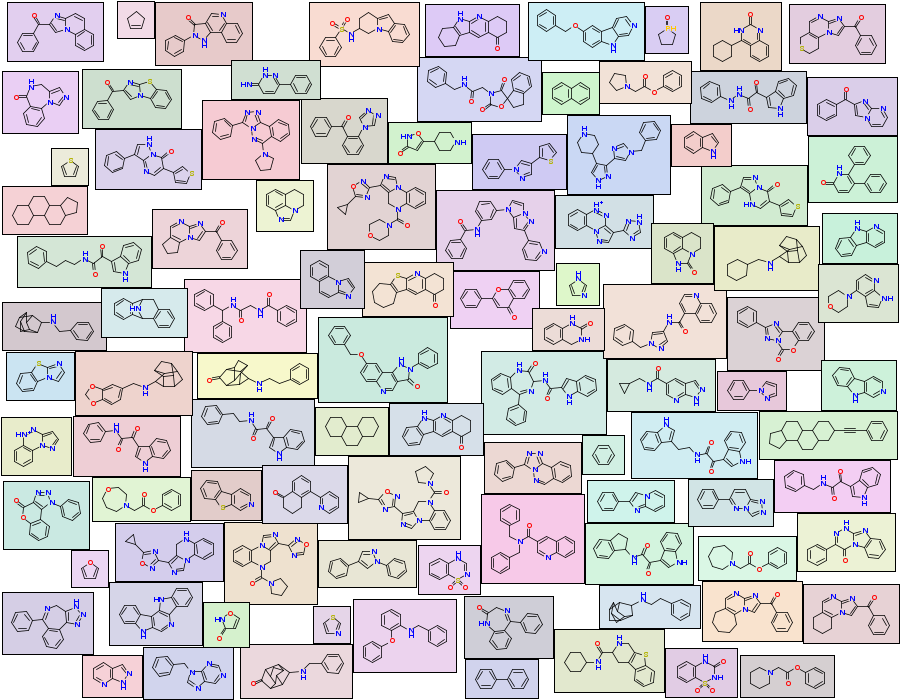

In [17]:
Image(filename='nonagonist_MurckoScaffold.png')

# nonagonist_CarbonScaffold

In [18]:
nonagonist_CarbonScaffold = []

for smiles in smiles_nonagonist:

    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    nonagonist_CarbonScaffold.append(scaffold_smiles)
    
    
nonagonist_CarbonScaffold_counts = Counter(nonagonist_CarbonScaffold)

sorted_nonagonist_CarbonScaffold_counts = sorted(nonagonist_CarbonScaffold_counts.items(), key=lambda x: x[1], reverse=True)

sorted_nonagonist_CarbonScaffold_counts

[('CC(CCC1CCCCC1)C(C)C1CCC2CCCCC21', 76),
 ('C1CCC2CCCC2C1', 75),
 ('C1CCCC1', 45),
 ('C1CCCCC1', 42),
 ('C1CCC(C2CCC(C3CCCCC3)C2)CC1', 31),
 ('C1CCC2C(C1)CC1CCCCC12', 26),
 ('C1CCC2C(C1)CCC1C(C3CCC(C4CC4)C3)CCC21', 24),
 ('C1CCC(C2CCC3C4CCCCC4CCC23)CC1', 22),
 ('CC(C1CCCCC1)C1CC2CCC3CCCCC3C2C1', 22),
 ('CC(CCCC1CCCCC1)C(C)C1CCC2CCCCC21', 20),
 ('C1CCC(C2CCC3C2CC(C2CCCC2)C2CCCCC23)CC1', 19),
 ('CC(C1CCCCC1)C1CC2CCCCC2C1', 19),
 ('CC1CCC(C2CCCCC2)CC1', 18),
 ('C1CCC2C(C1)CCC1CCCC12', 17),
 ('CC1CCCC1', 15),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 14),
 ('C1CCC(C2CCCC2)CC1', 14),
 ('', 13),
 ('CC1CCC(C2CCCCC2)C2CCCCC2C1', 11),
 ('C1CCC2C(C1)CC1C2CCC2CC3CCCCC3C21', 11),
 ('C1CCC(C2CCC3C4CCCCC4CCC23)C1', 10),
 ('C1CCC(C2CCC3CCCC3C3CCCCC23)CC1', 10),
 ('CC1C(C2CCCC2)CCC2C(C3CCCCC3)CCC12', 9),
 ('CC(CC1CCCCC1)C(C)C1CCC2CCCCC21', 9),
 ('CC(C1CCCC1)C1CC2C(C3CCC(C4CC4)C3)CCC2C2CCCCC12', 9),
 ('CC1CCCC2CC3CC4CCCCC4C3CC12', 8),
 ('CC1CC(C2CCCCC2)CC2CCCCC12', 8),
 ('C1CCC(CCC2C3C4CC5C6C4CC3C6C25)CC1', 8),
 (

In [19]:
len(sorted_nonagonist_CarbonScaffold_counts)

299

In [20]:
# 输出smiles
for skeleton, count in sorted_nonagonist_CarbonScaffold_counts[0:100]:
    print(f'{skeleton}')

CC(CCC1CCCCC1)C(C)C1CCC2CCCCC21
C1CCC2CCCC2C1
C1CCCC1
C1CCCCC1
C1CCC(C2CCC(C3CCCCC3)C2)CC1
C1CCC2C(C1)CC1CCCCC12
C1CCC2C(C1)CCC1C(C3CCC(C4CC4)C3)CCC21
C1CCC(C2CCC3C4CCCCC4CCC23)CC1
CC(C1CCCCC1)C1CC2CCC3CCCCC3C2C1
CC(CCCC1CCCCC1)C(C)C1CCC2CCCCC21
C1CCC(C2CCC3C2CC(C2CCCC2)C2CCCCC23)CC1
CC(C1CCCCC1)C1CC2CCCCC2C1
CC1CCC(C2CCCCC2)CC1
C1CCC2C(C1)CCC1CCCC12
CC1CCCC1
C1CCC(C2CC3CCCCC3C2)CC1
C1CCC(C2CCCC2)CC1

CC1CCC(C2CCCCC2)C2CCCCC2C1
C1CCC2C(C1)CC1C2CCC2CC3CCCCC3C21
C1CCC(C2CCC3C4CCCCC4CCC23)C1
C1CCC(C2CCC3CCCC3C3CCCCC23)CC1
CC1C(C2CCCC2)CCC2C(C3CCCCC3)CCC12
CC(CC1CCCCC1)C(C)C1CCC2CCCCC21
CC(C1CCCC1)C1CC2C(C3CCC(C4CC4)C3)CCC2C2CCCCC12
CC1CCCC2CC3CC4CCCCC4C3CC12
CC1CC(C2CCCCC2)CC2CCCCC12
C1CCC(CCC2C3C4CC5C6C4CC3C6C25)CC1
C1CCC(CCC2CCC3CC4CCCCC4C3C2)CC1
CC1CCC2CCCC2C2CCCCC12
CC(C1CCCCC1)C1CC2C(C3CCC(C4CC4)C3)CCC2C2CCCCC12
C1CCC2C(C1)CC1CCCC12
C1CCC(C2CCC(C3CCCC3)C2)CC1
C1CCC(C2CCC3CCCC3C2)CC1
CC(CCC1CCCCC1)C1CCC2C3CCCCC3CCC12
CC1C(C2CCCCC2)CC2C3CCCCC3CCC12
C1CCC2CCCCC2C1
CC1CCCC2C1CCCC2C1CCCCC

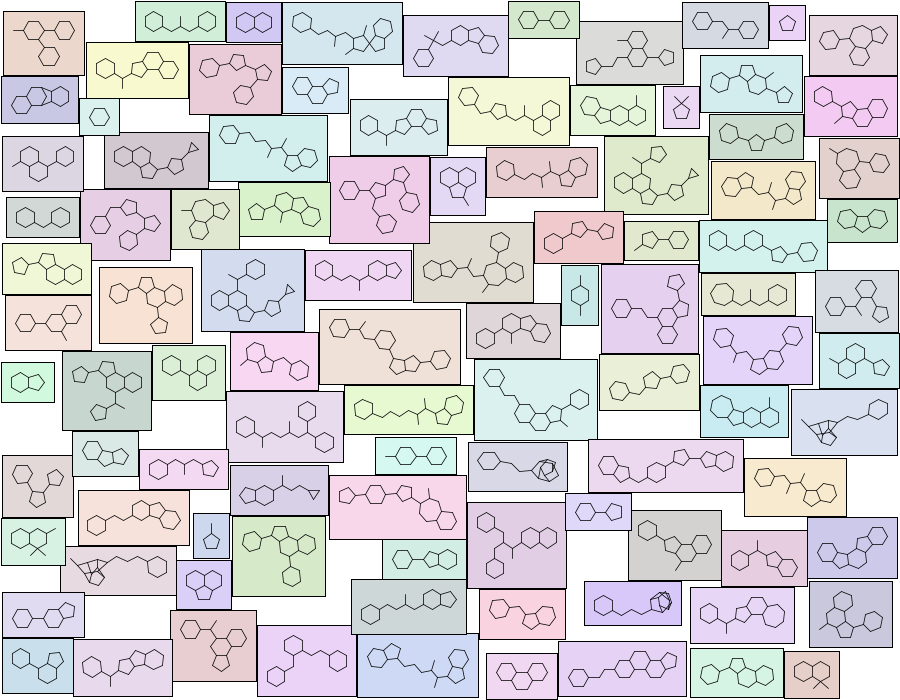

In [21]:
Image(filename='nonagonist_CarbonScaffold.png')